## Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from statistics import stdev
import scipy.stats as stats

In [2]:
### helper function to print std dev, mean, median of a attribute
def distri(x):
    std=stdev(x)
    avg=x.mean()
    med=x.median()
    print('The standard deviation value is {}, the mean value is {} and the median is {}'.format(std,avg,med))

### Importing dataset

In [3]:
### importing dataset
ins=pd.read_csv('insurance.csv')

## Exploratory Data Analysis

### 1. Shape of the data

In [7]:
print("\033[1m The shape of the Insurance dataframe is ",ins.shape,",that is there are",ins.shape[0],
      "observations and",ins.shape[1],"attributes \033[1m")


 The shape of the Insurance dataframe is  (1338, 7) ,that is there are 1338 observations and 7 attributes 


----%%%--------------------------------------------------------%%%-------------------------------------------------------

### 2. Data type of each attribute

In [59]:
print('Attribute in Insurance data have following data type :- \n',ins.dtypes)
print('\033[1m Out of 7 attributes, 4 are numeric and 3 are categorical \033[1m')

Attribute in Insurance data have following data type :- 
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
 Out of 7 attributes, 4 are numeric and 3 are categorical 


----%%%--------------------------------------------------------%%%--------------------------------------------

### 3. Checking presence of missing values

In [60]:
print('\033[1m The Insurance data has',ins.isna().sum().sum(),'missing values \033[1m')


 The Insurance data has 0 missing values 


----%%%--------------------------------------------------------%%%--------------------------------------------

### 4. Five point summary for numerical attributes

In [47]:
print('Following is the 5 point summary for the numerical attributes in Insurance data\n'
      ,ins.describe().loc[['min','25%','50%','75%','max']])
#ins.describe().loc[['min','25%','50%','75%','max']]

Following is the 5 point summary for the numerical attributes in Insurance data
       age       bmi  children       charges
min  18.0  15.96000       0.0   1121.873900
25%  27.0  26.29625       0.0   4740.287150
50%  39.0  30.40000       1.0   9382.033000
75%  51.0  34.69375       2.0  16639.912515
max  64.0  53.13000       5.0  63770.428010


##### 25% of the data consist of population with each group of 27 years and less, which indicate even teenagers are aware about buying an health insurance
##### 50% of the base is having 1 or no dependents, with maximum number of dependents going up to 5
##### The distribution of charges attribute seems to be skewwed.

----%%%--------------------------------------------------------%%%----------------------------------------------

### 5. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

##### Correlation among bmi, age and charges

In [10]:
cor=ins[['bmi','age','charges']].corr()

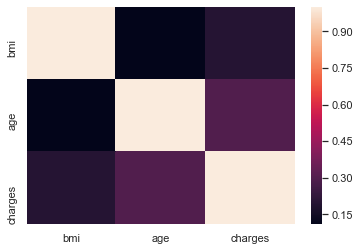

In [12]:
sns.heatmap(cor)
### No correlation can be seen among these variables

##### charges

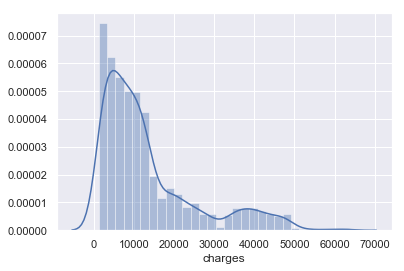

In [64]:
sns.distplot(ins['charges'])

In [8]:
distri(ins['charges'])

The standard deviation value is 12110.011236694001, the mean value is 13270.422265141257 and the median is 9382.033


##### As observed from the above figure and the function output, it is pretty evident that the distribution of charges attritbute is highly skewed to the right and widely spread. The average charge amount is significantly greater than the median value. 

##### Age

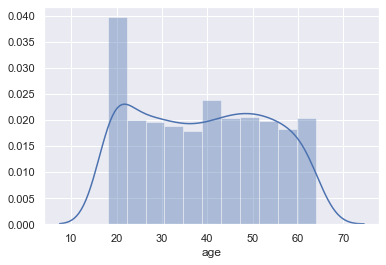

In [33]:
sns.distplot(ins['age'])

In [10]:
distri(ins['age'])

The standard deviation value is 14.049960379216156, the mean value is 39.20702541106129 and the median is 39.0


##### There is significant peak around the age bracket, 18-20, which might be the result of some campaign or any offer by the insurance company. Also the shape of the  age distribution is slightly similar to shape of wave which indicates bi-modal distribution. 

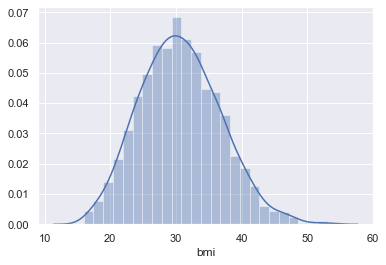

In [34]:
sns.distplot(ins['bmi'])

In [4]:
distri(ins['bmi'])

The standard deviation value is 6.098186911679014, the mean value is 30.663396860986538 and the median is 30.4


##### The mean and median are almost similar. The shape is very much close to bell-shape curve. There are few outliers present on the right tail, those are the people who end up paying high charges for the insurance.

----%%%--------------------------------------------------------%%%-------------------------

### 6. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [40]:
ins[['age','bmi','charges']].skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

##### Since skewness value for Charges is greater than 1, it is positively skewed and the distribution is substantial and far from symmetrical distribution. Age and bmi are not skewed.

----%%%--------------------------------------------------------%%%-------------------------

### 7. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

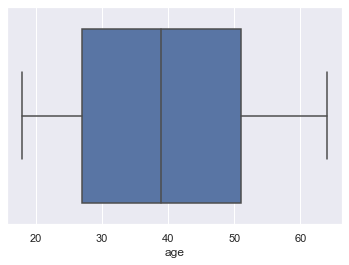

In [63]:
sns.boxplot(ins['age'])

##### Boxplot indicates absence of outliers in the age attribute

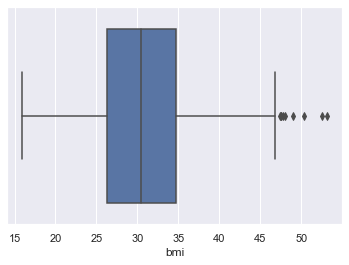

In [64]:
sns.boxplot(ins['bmi'])

##### There are some outliers in the bmi attribute

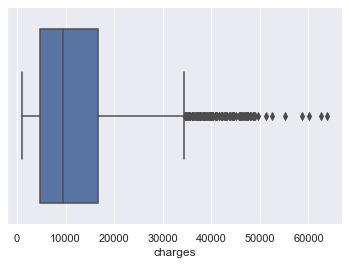

In [65]:
sns.boxplot(ins['charges'])

##### Since the shape of the distribution was highly skewed to the right, there has to be outliers in the variable and the same has been shown by the boxplot. Significant number of data points are falling beyond the outlier range 

We can check the count of outliers in each variable as below 

In [69]:
Q1 = ins[['age','bmi','charges']].quantile(0.25)
Q3 = ins[['age','bmi','charges']].quantile(0.75)
IQR = Q3 - Q1

In [61]:
((ins[['age','bmi','charges']] < (Q1 - 1.5 * IQR)) | (ins[['age','bmi','charges']] > (Q3 + 1.5 * IQR))).sum()

age          0
bmi          9
charges    139
dtype: int64

##### As mentioned above 10% of the charges amount are falling beyond outlier range.

----%%%--------------------------------------------------------%%%-------------------------

### 8. Distribution of categorical columns (include children)

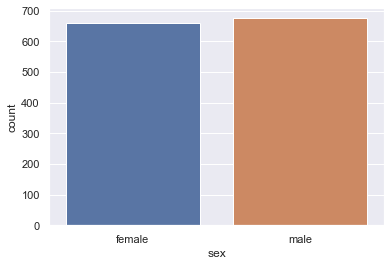

In [76]:
sns.countplot(ins['sex'])

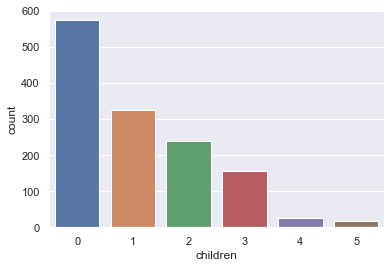

In [75]:
sns.countplot(ins['children'])

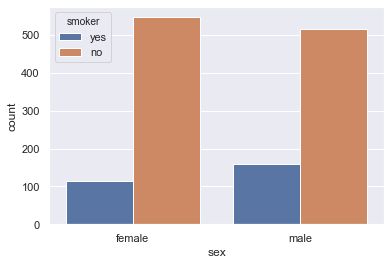

In [9]:
sns.countplot(ins['sex'],hue=ins['smoker'])

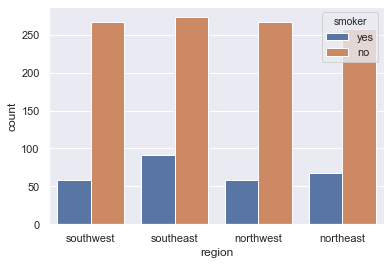

In [10]:
sns.countplot(ins['region'],hue=ins['smoker'])

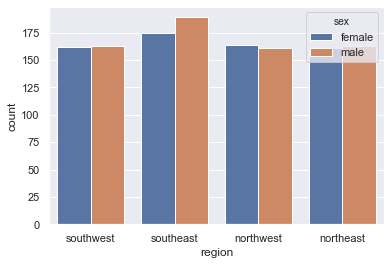

In [95]:
sns.countplot(ins['region'],hue=ins['sex'])

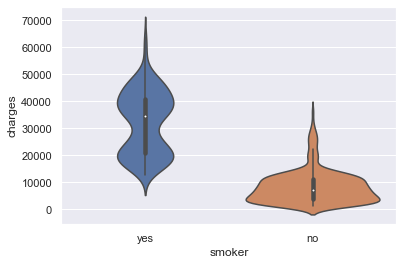

In [24]:
sns.violinplot(x=ins['smoker'],y=ins['charges'])

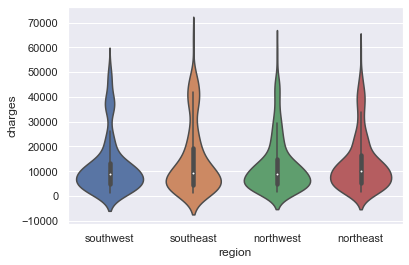

In [78]:
sns.violinplot(x=ins['region'],y=ins['charges'])

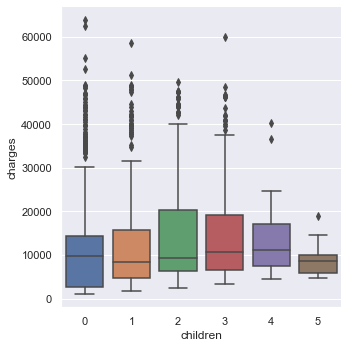

In [34]:
sns.catplot(x='children',y='charges',kind='box',data=ins)

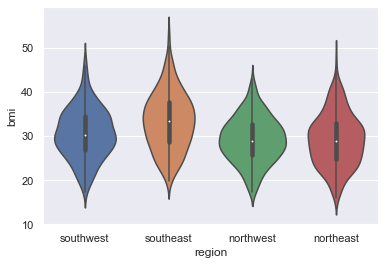

In [79]:
sns.violinplot(x=ins['region'],y=ins['bmi'])

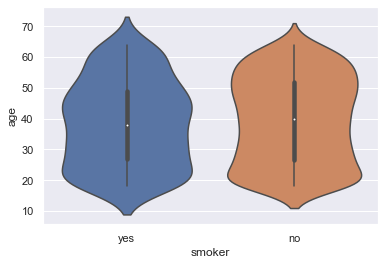

In [12]:
sns.violinplot(x=ins['smoker'],y=ins['age'])

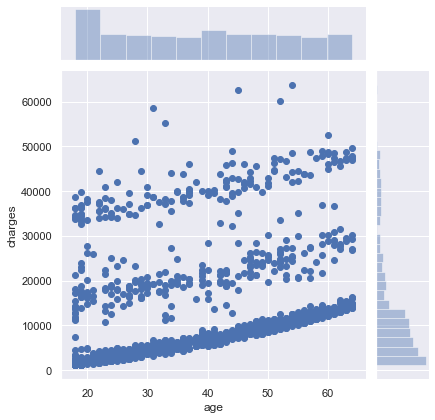

In [7]:
sns.jointplot(x=ins['age'],y=ins['charges'],kind='scatter')

##### *** Insights from categorical variables distribution ***

1. Gender ratio is almost same
2. Individuals with zero dependents are more compared to others
3. Smokers are paying more compared to non-smokers
3. Among the total smokers in the data, ratio of males is marginally high compared to female
4. Southwest has highest proportion of male and female among other regions. The smokers proportion in southwest is also the highest among all the regions which might be the reason the distribution of bmi and charges is on the higher side    

### 9. Pair plot that includes all the columns of the data frame

#### Performing categorical encoding

In [20]:
ins2=ins

In [16]:
##ins2['children'] = ins2.children.astype('object')

In [22]:
new_levels={'sex':{"male":1,"female":0},
            "smoker":{"yes":1,"no":0},
           "region":{"southeast":1,"northwest":2,"southwest":3,"northeast":4}}

In [23]:
ins2.replace(new_levels,inplace=True)

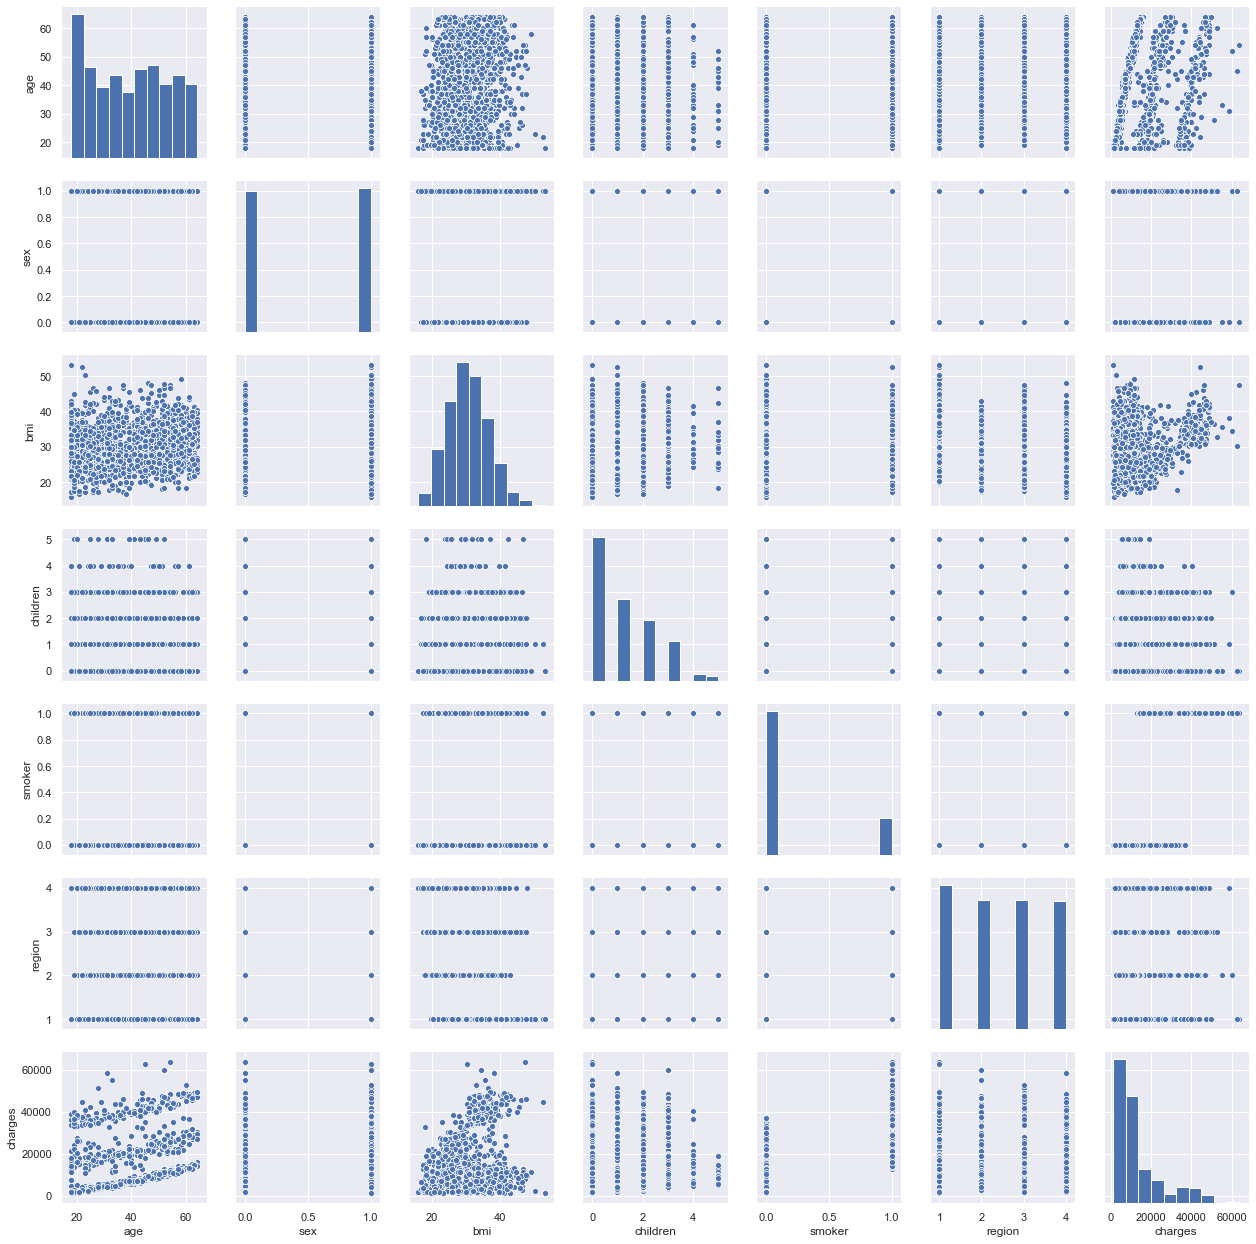

In [27]:
sns.pairplot(data=ins2)

## Hypothesis Testing

### 1. Do charges of people who smoke differ significantly from the people who don't?

#### Framing hypothesis
Ho= There is no difference between the charges among the two groups i.e. smokers and non-smokers (mu1=mu2)

Ha= There is difference between the charges among the two groups i.e. smokers and non-smokers (mu1!=mu2)

Here, two sample size are not equal but we will assume equal variance and
level of significance, alpha=5%

In [14]:
sample_smk_y=ins[ins['smoker']=='yes'].iloc[:,6]
sample_smk_n=ins[ins['smoker']=='no'].iloc[:,6]

In [16]:
sample_smk_y.mean()

32050.23183153285

In [4]:
sample_smk_y.shape  ### 274 rows
sample_smk_n.shape  ### 1064 rows

(1064,)

In [10]:
t, p_twosided = stats.ttest_ind(sample_smk_y, sample_smk_n, equal_var=True)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

t =  46.664921172723716 , p_twosided =  8.271435842177219e-283 , p_onesided = 4.1357179210886093e-283


#####  Since p-value is less than 0.05, we reject Ho

##### Hence, there is a significant difference between charges of people who smoke and who don't smoke

----%%%--------------------------------------------------------%%%-------------------------

### 2. Does bmi of males differ significantly from that of females?

#### Framing hypothesis
Ho= There is no difference between the BMI among the two groups i.e. male and female (mu1=mu2)

Ha= There is difference between the BMI among the two groups i.e. male and female (mu1!=mu2)

Here, two sample size are not equal but we will assume equal variance and
level of significance, alpha=5%

In [3]:
bmi_m=ins[ins['sex']=='male'].iloc[:,2]
bmi_f=ins[ins['sex']=='female'].iloc[:,2]

In [13]:
bmi_f.shape

(662,)

In [8]:
bmi_m.shape

(676,)

In [10]:
t, p_twosided = stats.ttest_ind(bmi_m, bmi_f, equal_var=True)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

t =  1.696752635752224 , p_twosided =  0.08997637178984932 , p_onesided = 0.04498818589492466


#####  Since t-statistic is less than t-critical value (1.96), we fail to reject Ho

##### Hence, there is no significant difference between bmi of male and female

----%%%--------------------------------------------------------%%%-------------------------

### 3. Is the proportion of smokers significantly different in different genders?

We want to see whether the proportions of smokers within the group is same or not

Ho: The two proportions are same

Ha: The two proportions are not equal


In [14]:
f_smokers=ins[(ins['sex']=='female') & (ins['smoker']=='yes')].count()[1]

In [15]:
m_smokers=ins[(ins['sex']=='male') & (ins['smoker']=='yes')].count()[1]

In [16]:
m_count=ins['sex'].value_counts()[0]

In [17]:
f_count=ins['sex'].value_counts()[1]

In [18]:
print('Proportion of Smokers in Female',f_smokers/f_count)
print('Proportion of Smokers in Male',m_smokers/m_count)

Proportion of Smokers in Female 0.17371601208459214
Proportion of Smokers in Male 0.23520710059171598


##### To test the proportion of Smokers among the Gender statistically, we will use Z test of proportion

In [13]:
from statsmodels.stats.proportion import proportions_ztest ### importing module for z test of proportions

In [34]:
stat, pval = proportions_ztest([f_smokers, m_smokers] , [f_count, m_count])

In [35]:
stat,pval

(-2.7867402154855503, 0.005324114164320532)

#### Since, the p-value is less than alpha, we reject Ho

#### Hence, the proportion of smokers among the gender is siginificantly different

----%%%--------------------------------------------------------%%%-------------------------

### 4. Is the distribution of bmi across women with no children, one child and two children, the same?


Ho: There is no significant difference in bmi across women with no children, one child and two children
    .i.e mu1=mu2=mu3
    
Ha: There is a significant difference in bmi across women with no children, one child and two children
    .i.e atleast one mu differs
    
Level of significane =5%    

In [51]:
female_bmi=ins[(ins['sex']=='female') & (ins['children']<3)].iloc[:,2:4].reindex(['children','bmi'],axis=1).sort_values(by=['children'])

##### Importing module for ANOVA 

In [55]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = female_bmi).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


Here, since the p-value is greater than 0.05, we fail to reject Ho

#### Hence using ANOVA we conclude that, there is no significant difference in bmi across women with no children, one child and two children

## End